# Crawling Using Selenium
* 목적: 특정 사이트의 게시글들을 모두 불러오기
* 사용라이브러리: Selenium

In [19]:
# os 확인
import platform

print(platform.architecture())

('64bit', 'WindowsPE')


In [20]:
# python version 확인
!python --version

Python 3.8.5


In [24]:
# 현재 경로 확인
%pwd

'C:\\Users\\moon\\code'

In [144]:
# selenium 설치
!pip install selenium==3.14.1

In [145]:
# 필요한 모듈과 라이브러리 임포트
import pandas as pd
from selenium import webdriver

In [30]:
# 웹 브라우저 드라이버 버전 확인
webdriver.__version__

'3.14.1'

In [36]:
# 접근하고자 하는 사이트의 링크 정의
website_link = 'https://barosotong.gwangju.go.kr/agoraVView.do?pageId=platform109&seq=5308471&orderBy=B&sort=D&listType=C&searchCtgry=agora01&searchTp=T'

In [37]:
# 크롬 웹 브라우저 92버전의 경로 정의 
driver_path = os.getcwd() + '/chromedriver92'

In [38]:
# 접근하고자 하는 사이트를 드라이버로 열기
driver = webdriver.Chrome(driver_path)
driver.get(website_link)

## 토론 주제와 기간 가져오기

In [60]:
# 게시글 제목 가져오기 => 파일명 저장 
title = driver.find_element_by_class_name("txt").text
time.sleep(0.1)
title # 정규화 과정으로 한글만 추출할 것

'도시철도 연계 시내버스 노선개편용역 관련 시민 의견수렴\n-'

In [62]:
# 게시글 토론 기간 가져오기
remain = driver.find_element_by_class_name("remain2").text
time.sleep(0.1)
remain.split(' ~ ')

['2021-02-25', '2021-09-30']

## 게시글 가져오기

### 한 페이지내 글들을 한번에 가져오기

In [88]:
# 한 페이지내 글을 모두 담고 있는 id 요소 찾는다. 
post_lst = driver.find_element_by_id("MList")

# 텍스트만 추출한다. 
post_corpus = post_lst.text

# 엔터키 기준으로 한줄씩 구분한다. 
sen_corpus = post_corpus.splitlines()
sen_corpus[:40]

['네이버 로그인',
 '박OO2021-08-03 17:06',
 '구분',
 '노선',
 '',
 '1. 귀하의 성별은 어떻게 되십니까?',
 '여',
 '',
 '2. 귀하의 출생연도는 어떻게 되십니까?',
 '1980',
 '',
 '3. 귀하 거주 지역은 어떻게 되십니까?',
 '북구 임동',
 '',
 '4. 귀하가 주로 이용하는 노선과 정류소는 어떻게 되십니까?',
 '첨단 95 임동농협',
 '',
 '5. 귀하께서 버스를 이용하면서 평소 불편하다고 느끼는 사항과 노선개편을 통해 개선이 필요한 내용을 아래에 자유롭게 작성해 주시기 바랍니다.',
 '임동농협과 노대동 송화마을1단지까지 운행하는 노선 신설 건의합니다. 현재 95번은 배차 간격이 10~20분으로 그다지 짧은 간격은 아닌데다(이용시마다 실체감상 거의 20분 간격으로 배차된다고 느꼈음), 임동&gt;금남로&gt;학동&gt;방림동&gt;백운광장&gt;진월동 까지만 해도 거의 20개의 정류장을 경유하는데다, 교통흐름이 복잡하고 신호걸림이 잦은 금남로, 학동, 백운광장 구간을 통과하느라 교통혼잡 시간대가 아닌 평일 낮 시간대에도 편도 45분 이상이 소요되는 등 거리에 비해 경유장류장개수와 소요시간이 많아 이용시마다 불편함을 체감중입니다. 교통흐름과 신호가 복잡한 구간들을 거의 다 경유하는 95번 노선을 변경할 수 없다면, 차라리 임동 &gt; 농성동 &gt; 월산동 &gt; 백운광장 &gt; 진월동 &gt;노대동 방면으로 소요시간이 상대적으로 적은 노선을 신설했으면 합니다!!! 매번 편도 45분씩이나 걸리는 95번 뿐인데다, 다른 환승노선들도 전부 다 1시간 이상 소요되는 노선들뿐이라 정말로 불편함이 너무 큽니다~!!! 아까운 시간과 불편함을 조금이라도 단축할 수 있는 스마트한 노선의 빠른 신설을 기다립니다~!!!',
 '',
 '남구 진월동, 노대동에서 첨단 보훈병원까지 한번에 가는 직행 노선도 없을뿐더러, 전부가 환승 노선들 뿐인데 이마저도 환승대기시간까지 포함하면 전 노선들이 2시간이 넘게

In [113]:
# 가장 첫번째 글이 "~ 로그인"으로 시작되는 점을 활용해 게시글 구분
post_sep = []
cnt = 0 
for idx in range(len(sen_corpus)):
    if sen_corpus[idx].endswith(" 로그인") is True: 
        cnt += 1 
        post_sep.append(idx)
        print(f"{cnt}번째 게시글의 index: {idx}")

1번째 게시글의 index: 0
2번째 게시글의 index: 22
3번째 게시글의 index: 42
4번째 게시글의 index: 65
5번째 게시글의 index: 85
6번째 게시글의 index: 106
7번째 게시글의 index: 126
8번째 게시글의 index: 146
9번째 게시글의 index: 168
10번째 게시글의 index: 191


In [139]:
# 게시글 구분하여 저장 
posts = []
for idx in range(1, len(post_sep)):
    print(sen_corpus[post_sep[idx-1]:post_sep[idx]])
    print("-"*100)
    posts.append(sen_corpus[post_sep[idx-1]:post_sep[idx]])
    
    # 마지막 게시글은 끝까지 읽기
    if idx == len(post_sep)-1:
        posts.append(sen_corpus[post_sep[idx]:])    
print(f"{len(posts)}개의 게시글")

['네이버 로그인', '박OO2021-08-03 17:06', '구분', '노선', '', '1. 귀하의 성별은 어떻게 되십니까?', '여', '', '2. 귀하의 출생연도는 어떻게 되십니까?', '1980', '', '3. 귀하 거주 지역은 어떻게 되십니까?', '북구 임동', '', '4. 귀하가 주로 이용하는 노선과 정류소는 어떻게 되십니까?', '첨단 95 임동농협', '', '5. 귀하께서 버스를 이용하면서 평소 불편하다고 느끼는 사항과 노선개편을 통해 개선이 필요한 내용을 아래에 자유롭게 작성해 주시기 바랍니다.', '임동농협과 노대동 송화마을1단지까지 운행하는 노선 신설 건의합니다. 현재 95번은 배차 간격이 10~20분으로 그다지 짧은 간격은 아닌데다(이용시마다 실체감상 거의 20분 간격으로 배차된다고 느꼈음), 임동&gt;금남로&gt;학동&gt;방림동&gt;백운광장&gt;진월동 까지만 해도 거의 20개의 정류장을 경유하는데다, 교통흐름이 복잡하고 신호걸림이 잦은 금남로, 학동, 백운광장 구간을 통과하느라 교통혼잡 시간대가 아닌 평일 낮 시간대에도 편도 45분 이상이 소요되는 등 거리에 비해 경유장류장개수와 소요시간이 많아 이용시마다 불편함을 체감중입니다. 교통흐름과 신호가 복잡한 구간들을 거의 다 경유하는 95번 노선을 변경할 수 없다면, 차라리 임동 &gt; 농성동 &gt; 월산동 &gt; 백운광장 &gt; 진월동 &gt;노대동 방면으로 소요시간이 상대적으로 적은 노선을 신설했으면 합니다!!! 매번 편도 45분씩이나 걸리는 95번 뿐인데다, 다른 환승노선들도 전부 다 1시간 이상 소요되는 노선들뿐이라 정말로 불편함이 너무 큽니다~!!! 아까운 시간과 불편함을 조금이라도 단축할 수 있는 스마트한 노선의 빠른 신설을 기다립니다~!!!', '', '남구 진월동, 노대동에서 첨단 보훈병원까지 한번에 가는 직행 노선도 없을뿐더러, 전부가 환승 노선들 뿐인데 이마저도 환승대기시간까지 포함하면 전 노선들이 2시간이 넘게 걸립니다!!! 환승노선뿐인데다 2시

In [170]:
# 각 게시글의 질문 답변을 뽑아낸다. 
category = []
gender = []
birth = []
address = []
often_use = []
opinion = []

for post in posts:
    for idx in range(len(post)):
        if post[idx].startswith("구분") is True:
            category.append(post[idx+1])
        elif post[idx].startswith("1. 귀하의 성별") is True:
            gender.append(post[idx+1])
        elif post[idx].startswith("2. 귀하의 출생연도") is True:
            birth.append(post[idx+1])
        elif post[idx].startswith("3. 귀하 거주 지역") is True:
            address.append(post[idx+1])
        elif post[idx].startswith("4. 귀하가 주로 이용하는 노선과 정류소") is True:
            often_use.append(post[idx+1])
        elif post[idx].startswith("5. 귀하께서 버스를 이용하면서 평소 불편하다고 느끼는 사항과 노선개편") is True:
            opinion.append(post[idx+1:])

In [171]:
opinion[0]

['임동농협과 노대동 송화마을1단지까지 운행하는 노선 신설 건의합니다. 현재 95번은 배차 간격이 10~20분으로 그다지 짧은 간격은 아닌데다(이용시마다 실체감상 거의 20분 간격으로 배차된다고 느꼈음), 임동&gt;금남로&gt;학동&gt;방림동&gt;백운광장&gt;진월동 까지만 해도 거의 20개의 정류장을 경유하는데다, 교통흐름이 복잡하고 신호걸림이 잦은 금남로, 학동, 백운광장 구간을 통과하느라 교통혼잡 시간대가 아닌 평일 낮 시간대에도 편도 45분 이상이 소요되는 등 거리에 비해 경유장류장개수와 소요시간이 많아 이용시마다 불편함을 체감중입니다. 교통흐름과 신호가 복잡한 구간들을 거의 다 경유하는 95번 노선을 변경할 수 없다면, 차라리 임동 &gt; 농성동 &gt; 월산동 &gt; 백운광장 &gt; 진월동 &gt;노대동 방면으로 소요시간이 상대적으로 적은 노선을 신설했으면 합니다!!! 매번 편도 45분씩이나 걸리는 95번 뿐인데다, 다른 환승노선들도 전부 다 1시간 이상 소요되는 노선들뿐이라 정말로 불편함이 너무 큽니다~!!! 아까운 시간과 불편함을 조금이라도 단축할 수 있는 스마트한 노선의 빠른 신설을 기다립니다~!!!',
 '',
 '남구 진월동, 노대동에서 첨단 보훈병원까지 한번에 가는 직행 노선도 없을뿐더러, 전부가 환승 노선들 뿐인데 이마저도 환승대기시간까지 포함하면 전 노선들이 2시간이 넘게 걸립니다!!! 환승노선뿐인데다 2시간이 넘는 게 시외버스도 아니고 시내버스 맞나요?? 남구 사는 사람들은 보훈병원 버스 타고 못갑니다... 제발 환승 없이 한번에 40분내로 갈 수 있는 노선 운영 기다립니다~!!!',
 '']

In [172]:
opinion = ["".join(opinion[idx]) for idx in range(len(opinion))]
opinion

['임동농협과 노대동 송화마을1단지까지 운행하는 노선 신설 건의합니다. 현재 95번은 배차 간격이 10~20분으로 그다지 짧은 간격은 아닌데다(이용시마다 실체감상 거의 20분 간격으로 배차된다고 느꼈음), 임동&gt;금남로&gt;학동&gt;방림동&gt;백운광장&gt;진월동 까지만 해도 거의 20개의 정류장을 경유하는데다, 교통흐름이 복잡하고 신호걸림이 잦은 금남로, 학동, 백운광장 구간을 통과하느라 교통혼잡 시간대가 아닌 평일 낮 시간대에도 편도 45분 이상이 소요되는 등 거리에 비해 경유장류장개수와 소요시간이 많아 이용시마다 불편함을 체감중입니다. 교통흐름과 신호가 복잡한 구간들을 거의 다 경유하는 95번 노선을 변경할 수 없다면, 차라리 임동 &gt; 농성동 &gt; 월산동 &gt; 백운광장 &gt; 진월동 &gt;노대동 방면으로 소요시간이 상대적으로 적은 노선을 신설했으면 합니다!!! 매번 편도 45분씩이나 걸리는 95번 뿐인데다, 다른 환승노선들도 전부 다 1시간 이상 소요되는 노선들뿐이라 정말로 불편함이 너무 큽니다~!!! 아까운 시간과 불편함을 조금이라도 단축할 수 있는 스마트한 노선의 빠른 신설을 기다립니다~!!!남구 진월동, 노대동에서 첨단 보훈병원까지 한번에 가는 직행 노선도 없을뿐더러, 전부가 환승 노선들 뿐인데 이마저도 환승대기시간까지 포함하면 전 노선들이 2시간이 넘게 걸립니다!!! 환승노선뿐인데다 2시간이 넘는 게 시외버스도 아니고 시내버스 맞나요?? 남구 사는 사람들은 보훈병원 버스 타고 못갑니다... 제발 환승 없이 한번에 40분내로 갈 수 있는 노선 운영 기다립니다~!!!',
 '백운광장역에 수완03 노선편입해주세요.',
 '03번 종점이 바뀌어서 너무 불편함. 조대까지 한번에 갈 수 있는 유일한 수완지구 버슨데첨단으로 종점을 바뀌고 첨단에서 사람들 다 타서 우미린2차 정류장에서 타도 서서1시간을 가야함. 03 버스 바꾸당했던 적도 많음.다시 03번 정류장 수완지구로 옮겼으면 좋겠음.첨단은 27번 대학교 다 들리는 버스 원래 있기라

In [175]:
print(len(opinion))

10


In [176]:
# 각 리스트를 데이터프레임으로 저장 
minwon_df = pd.DataFrame(data = list(zip(category, gender, birth, address, often_use, opinion))
                         , columns = ['구분', '성별', '출생연도', '거주지', '노선과 정류소', '불만사항'])
minwon_df.head()

,구분,성별,출생연도,거주지,노선과 정류소,불만사항
0,노선,여,1980,북구 임동,첨단 95 임동농협,임동농협과 노대동 송화마을1단지까지 운행하는 노선 신설 건의합니다. 현재 95번은 ...
1,노선,남,1984,남구 주월동,수완03 백운광장역,백운광장역에 수완03 노선편입해주세요.
2,"노선, 정류소, 환승체계",여,2000,광산구 장덕동,"03/현진1차~조선대,49/장덕마을~학동평화맨션,72/장덕마을~경신여고",03번 종점이 바뀌어서 너무 불편함. 조대까지 한번에 갈 수 있는 유일한 수완지구 ...
3,노선,남,2002,북구 용봉동,"정류소 : 비엔날레 입구, 비엔날레 정류소",비엔날레 입구에 사는 학생입니다. 비엔날레 입구에는 아시다 싶이 배차 간격이 매우 ...
4,노선,여,1990,남구 주월동,"수완03,진월07","백운광장 정류장에수완03,진월07 버스 정차를 요청합니다."


## 페이지 넘기기
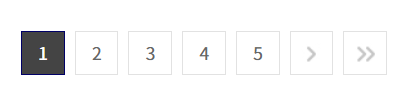    
xpath: "//*[@id="comtPage"]/div/ul/li[2]/a"

In [143]:
# 페이지 번호 넘기기
# 유의사항: 큰 따옴표 안에 따옴표는 작은 따옴표로 바꿔줘야함
driver.find_element_by_xpath("//*[@id='comtPage']/div/ul/li[1]/a").click() # 2페이지로 이동 => 숫자부분만 원하는 페이지 번호를 넣어주면 됨. 
time.sleep(0.1)

## 위의 과정을 합쳐서 전체 게시글을 읽어오기 feat.반복문 활용
1. 페이지내의 게시글을 읽는다. (각 페이지에는 10개의 게시글이 존재한다.)
2. 페이지 번호를 넘긴다.  
3. 1, 2, 3, 4, 5일 때 전체 페이지가 6, 7, 8, 9, 10으로 바뀌기 때문에 5개가 됐을 때, ">"으로 가는 버튼을 클릭한다. 
4. 마지막 번호에서 +1씩 해주면서 다음 번호로 넘어간다. (마지막 번호값 초기엔: 0)